In [1]:
#https://github.com/PPPW/deep-learning-random-explore/blob/master/CNN_archs/cnn_archs.ipynb

In [2]:
from fastai.vision.all import *

In [3]:
torch.cuda.is_available()

True

In [20]:
source = f'/home/oem/Images/dataset_fridge'
df_marks = pd.DataFrame({'fname':['p0'], 'label':['oeuf'], 'is_valid':[True]})

#os.chdir(source)
for root, dirs, files in os.walk(source, topdown = False):
   for name in files:
      my_path = os.path.join(source, root, name)
      categorie = root.split("/")[7]
      #print(my_path)
      new_row = {'fname':my_path[9:], 'label':categorie, 'is_valid':is_valid}
      df_marks = df_marks.append(new_row, ignore_index=True)
df_marks.drop(0)
print(df_marks[2:])

                                                                                     fname  \
2    /Images/dataset_fridge/DATASET/autres/crème fraiche/002/table/IMG_20210117_100613.jpg   
3    /Images/dataset_fridge/DATASET/autres/crème fraiche/002/frigo/IMG_20210117_100619.jpg   
4    /Images/dataset_fridge/DATASET/autres/crème fraiche/002/frigo/IMG_20210117_100621.jpg   
5    /Images/dataset_fridge/DATASET/autres/crème fraiche/003/table/IMG_20210117_100705.jpg   
6    /Images/dataset_fridge/DATASET/autres/crème fraiche/003/table/IMG_20210117_100706.jpg   
..                                                                                     ...   
767           /Images/dataset_fridge/DATASET/fruits/pomme/000/stockage/20210112_202148.jpg   
768              /Images/dataset_fridge/DATASET/fruits/pomme/000/table/20210112_202109.jpg   
769              /Images/dataset_fridge/DATASET/fruits/pomme/000/table/20210112_202116.jpg   
770              /Images/dataset_fridge/DATASET/fruits/pomme

In [36]:
df_marks.groupby('label').agg([ 'count']).reset_index().sort_values([(   'fname', 'count')], ascending=False)

,label,fname,is_valid
,,count,count
5,beurre,114,114
33,oeufs,106,106
23,fromage rapé,34,34
50,yaourt,31,31
28,lait,26,26
14,crème fraiche,24,24
42,poulet,22,22
38,pateFeuilletee,21,21
31,mayonnaise,20,20


In [43]:
#dls = ImageDataLoaders.from_df(df, path, folder='train', valid_col='is_valid', label_delim=' ',item_tfms=Resize(128), bs=4 ,batch_tfms=aug_transforms(size=128))
dls = ImageDataLoaders.from_df(df_marks[2:],path = f'/home/oem', valid_col='is_valid', label_delim=' ',
                               item_tfms=Resize(400), bs=8, num_worker=0, batch_tfms=aug_transforms(size=128*2))#,do_flip=False))


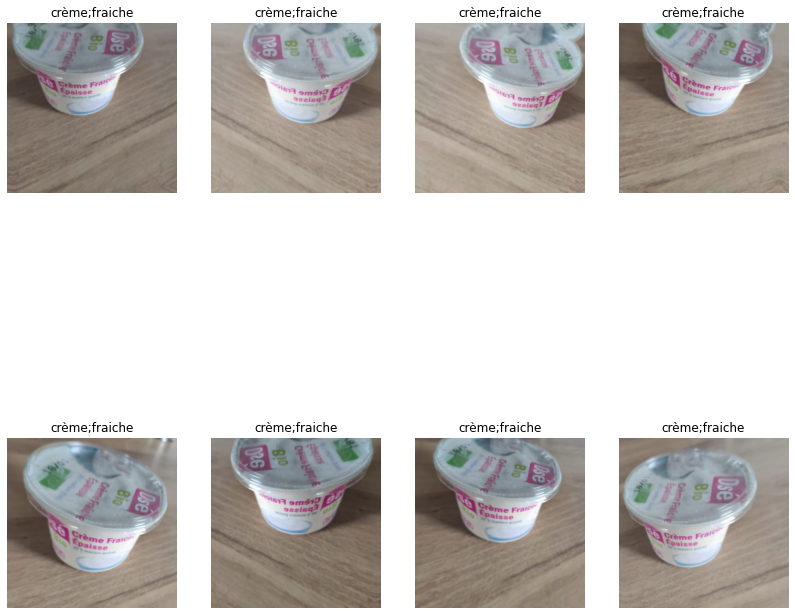

In [44]:
dls.show_batch(unique=True,figsize=(14,14))

In [45]:
len(dls.train)

96

In [46]:
len(dls.valid)

0

In [47]:
#learn = cnn_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh=0.5))

In [48]:
from torchvision import models

In [49]:
#learn = cnn_learner(dls, mansnet_fn, cut=-1, metrics=partial(accuracy_multi, thresh=0.5))
#learn = cnn_learner(dls, models.mobilenet_v2, cut=-1, pretrained=True,metrics=partial(accuracy_multi, thresh=0.5),cbs=[SaveModelCallback()])
learn = cnn_learner(dls, resnet18, pretrained=True,metrics=partial(accuracy_multi, thresh=0.5),cbs=[SaveModelCallback()])

In [51]:
#learn.lr_find()
learn.path

Path('/home/oem')

SuggestedLRs(lr_min=0.05248074531555176, lr_steep=0.04786301031708717)

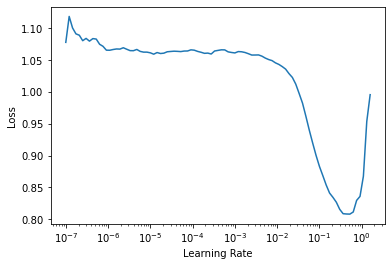

In [52]:
learn.lr_find()

In [16]:
learn.fit_one_cycle(10, lr_max=slice(0.01))

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.826696,0.875184,0.629032,00:11
1,0.665965,0.793049,0.645161,00:10
2,0.826446,0.742402,0.629032,00:10
3,0.918602,0.542273,0.758065,00:10
4,0.913749,0.483432,0.758065,00:10
5,0.926831,0.473111,0.887097,00:10
6,0.798335,0.454646,0.822581,00:10
7,0.865085,0.256761,0.838710,00:10
8,0.849165,0.460701,0.838710,00:10
9,0.846661,0.248253,0.870968,00:10


Better model found at epoch 0 with valid_loss value: 0.8751843571662903.
Better model found at epoch 1 with valid_loss value: 0.7930487394332886.
Better model found at epoch 2 with valid_loss value: 0.7424015402793884.
Better model found at epoch 3 with valid_loss value: 0.5422731637954712.
Better model found at epoch 4 with valid_loss value: 0.4834323823451996.
Better model found at epoch 5 with valid_loss value: 0.4731113612651825.
Better model found at epoch 6 with valid_loss value: 0.4546458423137665.
Better model found at epoch 7 with valid_loss value: 0.25676146149635315.
Better model found at epoch 9 with valid_loss value: 0.24825257062911987.


In [17]:
learn.unfreeze()
learn.fit_one_cycle(2, lr_max=slice(0.001))

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.807109,0.176984,0.903226,00:14
1,0.587197,0.213375,0.903226,00:14


Better model found at epoch 0 with valid_loss value: 0.17698383331298828.


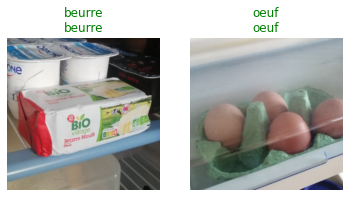

In [30]:
learn.show_results()

In [26]:
learn.load('/home/oem/models/model')

/home/oem/anaconda3/envs/fastaiv2/lib/python3.8/site-packages/fastai/learner.py:55: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


In [ ]:
learn.load('/home/oem/models/model')
learn.show_results()

In [36]:
learn.predict('/home/oem/Téléchargements/recette-e15348-salade-crudites-toute-simple.jpg')

((#1) ['beurre'], tensor([ True, False]), tensor([0.5401, 0.4101]))

In [40]:
learn.predict('/home/oem/Images/dataset_fridge/Dataset/Le beurre et l_argent du beurre /internet/beurre-bordier-demi-sel.jpg')

((#1) ['beurre'], tensor([ True, False]), tensor([9.9982e-01, 4.8473e-04]))